# Telecom Churn Management - Segmentation - Classification - Case Study

In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

### The dataset has data in 2 separate sheets for active customers and churned customers respectively

In [212]:
active_customers = pd.read_excel('Case_study_data.xlsx', sheet_name='Active Customers ')
print(active_customers.shape)
active_customers.head()

(9999, 29)


,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [213]:
churn_customers = pd.read_excel('Case_study_data.xlsx', sheet_name='Churn Customers')
print(churn_customers.shape)
churn_customers.head()

(10000, 30)


,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


### Data Approach
1. Add a new response variable 'Churn' to the dataset:
    
    1.1 Churn = 1 (Yes) for customers in churn_customers data
    
    1.2 Churn = 0 (No) for customers in active_customers data
    
2. Drop the ACCOUNT_STATUS feature from both the datasets
3. Merge the 2 datasets for predictive modeling

In [214]:
active_customers['Churn'] = 0
active_customers.drop('ACCOUNT_STATUS',axis=1,inplace=True)

churn_customers['Churn'] = 1
churn_customers.drop('ACCOUNT_STATUS',axis=1,inplace=True)

In [215]:
# column name correction to maintain uniformity amongst the 2 datasets
active_customers.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'}, 
                 inplace=True)

In [501]:
#active_customers = active_customers.reset_index().set_index('SITE_ACCOUNT_NUMBER')
#active_customers.dropna(how='all',inplace=True)
#churn_customers.dropna(how='all',inplace=True)
telco_customers = pd.concat([active_customers,churn_customers],ignore_index=True)

## Data Cleaning & EDA (Exploratory Data Analysis)

In [475]:
telco_customers.shape

(19999, 30)

In [476]:
telco_customers.columns

Index(['ADDRESS', 'AGE', 'CHURN_DATE', 'CITY', 'COMPANY_SOURCE_NAME',
       'COMPUTER_OWNER', 'Churn', 'DATE_OF_BIRTH', 'DIRECT_INDIRECT_CHANNEL',
       'EMAIL_ADDRESS', 'FEEDBACK', 'FIRST_COMMUNICATION_DATE', 'FIRST_NAME',
       'GENDER', 'INCOME', 'LAST_NAME', 'MARITAL_STATUS', 'MODEL',
       'MOST_RECENT_SALES_CHANNEL', 'PRESENCE_OF_CHILDREN', 'SALES_CHANNEL',
       'SALES_SOURCE', 'SATELLITE', 'SERVICE_PLAN', 'SITE_ACCOUNT_NUMBER',
       'SITE_TYPE_DESC', 'STATE', 'UPGRADE_DATE', 'WARRANTY_NAME', 'ZIPCODE'],
      dtype='object')

In [477]:
telco_customers.head()

,ADDRESS,AGE,CHURN_DATE,CITY,COMPANY_SOURCE_NAME,COMPUTER_OWNER,Churn,DATE_OF_BIRTH,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,...,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,STATE,UPGRADE_DATE,WARRANTY_NAME,ZIPCODE
0,TRIPLE CANTHOOK LN 0 0 0,69,NaT,GERMANTOWN,HNS Customers,N,0,1-5-1943,Indirect,Ace.FUTRELL@hotmail.com,...,Vars,UNKNOWN,SPACEWAY3,NaN,AMR-11112345,Broadband Remote,MD,2003-12-14,0,20876
1,RR JOE 62 0 0 0,43,NaT,WEST BERLIN,HNS Customers,N,0,28-12-1969,Indirect,Robert.Fitzpatrick@hughes.net,...,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,NJ,2006-08-08,0,8091
2,69330 1 RD WAY 0 0,58,NaT,MERRYVILLE,HNS Customers,N,0,20-7-1954,Indirect,EDWARD.Vipperman@rossaweb.net,...,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,LA,2004-03-17,0,70653
3,PO ROCK ST 421 0 0,22,NaT,ZANESVILLE,HNS Customers,NaN,0,10-5-1990,Direct,Danny.Jyotinagaram@sipnsearch.com,...,Sales Agents,NaN,SPACEWAY3,Power150,AMR-14837821,Spaceway,OH,2005-03-27,0,43701
4,626 NW RD 0 0 0,36,NaT,CALLICOON,HNS Customers,NaN,0,11-5-1976,Indirect,Joanne.BARNOSKY@geeksquad.com,...,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,NY,2004-06-14,0,12723


### Missing Values & DataType correction

In [502]:
# correcting the missing value notations
telco_customers.replace('.',np.nan,inplace=True)
telco_customers.replace('.!',np.nan,inplace=True)
telco_customers.replace('',np.nan,inplace=True)
telco_customers.replace(' ',np.nan,inplace=True)
telco_customers.replace('#REF!',np.nan,inplace=True)
telco_customers.DIRECT_INDIRECT_CHANNEL.replace(0,np.nan,inplace=True)
telco_customers.SALES_SOURCE.replace(0,np.nan,inplace=True)
telco_customers.SATELLITE.replace(0,np.nan,inplace=True)
telco_customers.WARRANTY_NAME.replace(0,np.nan,inplace=True)
telco_customers.MOST_RECENT_SALES_CHANNEL.replace(0,np.nan,inplace=True)

In [479]:
telco_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 30 columns):
ADDRESS                      19936 non-null object
AGE                          19634 non-null float64
CHURN_DATE                   10000 non-null datetime64[ns]
CITY                         19932 non-null object
COMPANY_SOURCE_NAME          19980 non-null object
COMPUTER_OWNER               13701 non-null object
Churn                        19999 non-null int64
DATE_OF_BIRTH                19634 non-null object
DIRECT_INDIRECT_CHANNEL      19161 non-null object
EMAIL_ADDRESS                19959 non-null object
FEEDBACK                     16057 non-null object
FIRST_COMMUNICATION_DATE     19989 non-null datetime64[ns]
FIRST_NAME                   19972 non-null object
GENDER                       17490 non-null float64
INCOME                       19681 non-null object
LAST_NAME                    19991 non-null object
MARITAL_STATUS               16058 non-null float64
MODEL 

In [503]:
telco_customers.Churn = telco_customers.Churn.astype('category')

In [504]:
telco_customers['GENDER'] = telco_customers['GENDER'].fillna(-1)
telco_customers['GENDER'] = telco_customers['GENDER'].astype(int)
telco_customers['GENDER'] = telco_customers['GENDER'].astype(str)
telco_customers['GENDER'] = telco_customers['GENDER'].replace('-1', np.nan)

In [505]:
telco_customers['PRESENCE_OF_CHILDREN'] = telco_customers['PRESENCE_OF_CHILDREN'].fillna(-1)
telco_customers['PRESENCE_OF_CHILDREN'] = telco_customers['PRESENCE_OF_CHILDREN'].astype(int)
telco_customers['PRESENCE_OF_CHILDREN'] = telco_customers['PRESENCE_OF_CHILDREN'].astype(str)
telco_customers['PRESENCE_OF_CHILDREN'] = telco_customers['PRESENCE_OF_CHILDREN'].replace('-1', np.nan)

In [506]:
telco_customers['MARITAL_STATUS'] = telco_customers['MARITAL_STATUS'].fillna(-1)
telco_customers['MARITAL_STATUS'] = telco_customers['MARITAL_STATUS'].astype(int)
telco_customers['MARITAL_STATUS'] = telco_customers['MARITAL_STATUS'].astype(str)
telco_customers['MARITAL_STATUS'] = telco_customers['MARITAL_STATUS'].replace('-1', np.nan)

In [507]:
telco_customers['ZIPCODE'] = telco_customers['ZIPCODE'].fillna(-1)
telco_customers['ZIPCODE'] = telco_customers['ZIPCODE'].astype(int)
telco_customers['ZIPCODE'] = telco_customers['ZIPCODE'].astype(str)
telco_customers['ZIPCODE'] = telco_customers['ZIPCODE'].replace('-1', np.nan)

In [485]:
# check for missing values
telco_customers.isnull().any().sum()

29

In [486]:
telco_customers.isnull().sum()

ADDRESS                         63
AGE                            365
CHURN_DATE                    9999
CITY                            67
COMPANY_SOURCE_NAME             19
COMPUTER_OWNER                6298
Churn                            0
DATE_OF_BIRTH                  365
DIRECT_INDIRECT_CHANNEL        838
EMAIL_ADDRESS                   40
FEEDBACK                      3942
FIRST_COMMUNICATION_DATE        10
FIRST_NAME                      27
GENDER                        2509
INCOME                         318
LAST_NAME                        8
MARITAL_STATUS                3941
MODEL                         1386
MOST_RECENT_SALES_CHANNEL       87
PRESENCE_OF_CHILDREN          2567
SALES_CHANNEL                 5508
SALES_SOURCE                   993
SATELLITE                     2251
SERVICE_PLAN                  2721
SITE_ACCOUNT_NUMBER              1
SITE_TYPE_DESC                  74
STATE                           67
UPGRADE_DATE                   889
WARRANTY_NAME       

In [508]:
telco_customers.AGE.fillna(telco_customers.AGE.mean(),inplace=True)
telco_customers.COMPUTER_OWNER.fillna('N',inplace=True)
telco_customers.DIRECT_INDIRECT_CHANNEL.fillna('Indirect',inplace=True)
telco_customers.FEEDBACK.fillna('BAD',inplace=True)
telco_customers.GENDER.fillna('1',inplace=True)
telco_customers.INCOME.fillna('0',inplace=True)
telco_customers.MARITAL_STATUS.fillna('0',inplace=True)
telco_customers.PRESENCE_OF_CHILDREN.fillna('0',inplace=True)
telco_customers.SALES_CHANNEL.fillna('Sales Agents',inplace=True)
telco_customers.SALES_SOURCE.fillna('TAG',inplace=True)
telco_customers.SATELLITE.fillna('SPACEWAY3',inplace=True)
telco_customers.SERVICE_PLAN.fillna('Home',inplace=True)
telco_customers.drop(9998,inplace=True) # drop the row with SITE_ACCOUNT_NUMBER = NaN
telco_customers.SITE_TYPE_DESC.fillna('Broadband Remote',inplace=True)
telco_customers.WARRANTY_NAME.fillna('Not Applicable',inplace=True)
telco_customers.COMPANY_SOURCE_NAME.fillna('HNS Customers',inplace=True)
telco_customers.MODEL.fillna('HN7000S',inplace=True)
telco_customers.MOST_RECENT_SALES_CHANNEL.fillna('Direct',inplace=True)
telco_customers.drop('DATE_OF_BIRTH',axis=1,inplace=True) # we already have Age
telco_customers.FIRST_COMMUNICATION_DATE.fillna(telco_customers.FIRST_COMMUNICATION_DATE.max(),inplace=True)
# Set address features to unknown
telco_customers.ADDRESS.fillna('UNKNOWN',inplace=True)
telco_customers.CITY.fillna('UNKNOWN',inplace=True)
telco_customers.STATE.fillna('UNKNOWN',inplace=True)
telco_customers.ZIPCODE.fillna('UNKNOWN',inplace=True)

telco_customers.FIRST_NAME.fillna(telco_customers.LAST_NAME,inplace=True)
telco_customers.LAST_NAME.fillna(telco_customers.FIRST_NAME,inplace=True)
telco_customers.EMAIL_ADDRESS.fillna('UNKNOWN',inplace=True)

In [509]:
# New features from Date columns
telco_customers['DAYS_ACTIVE'] = telco_customers['CHURN_DATE'] - telco_customers['FIRST_COMMUNICATION_DATE']
# missing values are for currently active customers, set a very high value say 100 years
telco_customers.DAYS_ACTIVE.fillna(pd.to_datetime('2100-01-01') - df['FIRST_COMMUNICATION_DATE'],inplace=True)
telco_customers.drop('CHURN_DATE',axis=1,inplace=True)

telco_customers['FLAG_UPGRADE'] = np.where(telco_customers.UPGRADE_DATE.isnull(),0,1)
telco_customers.drop('UPGRADE_DATE',axis=1,inplace=True)

In [525]:
telco_customers.DAYS_ACTIVE = telco_customers.DAYS_ACTIVE.astype('timedelta64[D]')
telco_customers.DAYS_ACTIVE = telco_customers.DAYS_ACTIVE.astype(int)

In [570]:
telco_customers.INCOME.replace(0,'0',inplace=True)
telco_customers.INCOME.replace(1,'1',inplace=True)
telco_customers.INCOME.replace(2,'2',inplace=True)
telco_customers.INCOME.replace(3,'3',inplace=True)
telco_customers.INCOME.replace(4,'4',inplace=True)
telco_customers.INCOME.replace(5,'5',inplace=True)
telco_customers.INCOME.replace(6,'6',inplace=True)
telco_customers.INCOME.replace(7,'7',inplace=True)
telco_customers.INCOME.replace(8,'8',inplace=True)
telco_customers.INCOME.replace(9,'9',inplace=True)
telco_customers.INCOME.replace(10,'10',inplace=True)

In [529]:
telco_customers.columns

Index(['ADDRESS', 'AGE', 'CITY', 'COMPANY_SOURCE_NAME', 'COMPUTER_OWNER',
       'Churn', 'DIRECT_INDIRECT_CHANNEL', 'EMAIL_ADDRESS', 'FEEDBACK',
       'FIRST_COMMUNICATION_DATE', 'FIRST_NAME', 'GENDER', 'INCOME',
       'LAST_NAME', 'MARITAL_STATUS', 'MODEL', 'MOST_RECENT_SALES_CHANNEL',
       'PRESENCE_OF_CHILDREN', 'SALES_CHANNEL', 'SALES_SOURCE', 'SATELLITE',
       'SERVICE_PLAN', 'SITE_ACCOUNT_NUMBER', 'SITE_TYPE_DESC', 'STATE',
       'WARRANTY_NAME', 'ZIPCODE', 'DAYS_ACTIVE', 'FLAG_UPGRADE'],
      dtype='object')

### Data is clean now

## Key Visualizations

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f6d3908>,
      dtype=object)

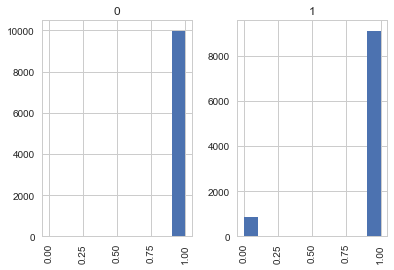

In [526]:
telco_customers.hist(column='FLAG_UPGRADE',by='Churn',bins=10)

 Upgrade does seem to be a factor for Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a224d4908>,
      dtype=object)

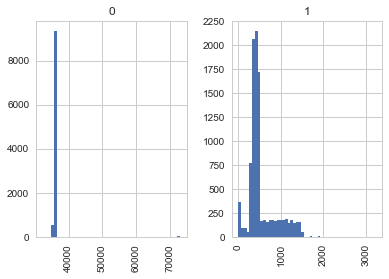

In [534]:
telco_customers.hist(column='DAYS_ACTIVE',by='Churn',bins=50)

Customers who have been active for under 4 years are prone to Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2003bba8>,
      dtype=object)

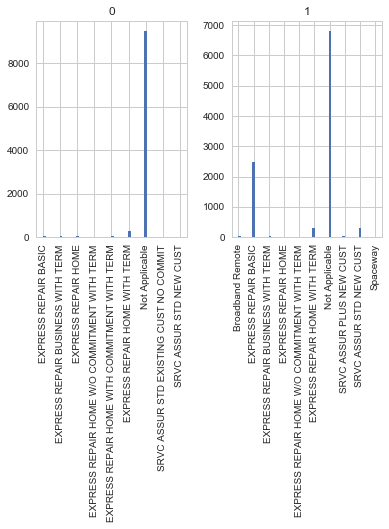

In [533]:
telco_customers.hist(column='WARRANTY_NAME',by='Churn',bins=50)

Warranties seem to be a deciding factor. Perhaps if the warranties are not fulfilled, customers Churn.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8a9828>,
      dtype=object)

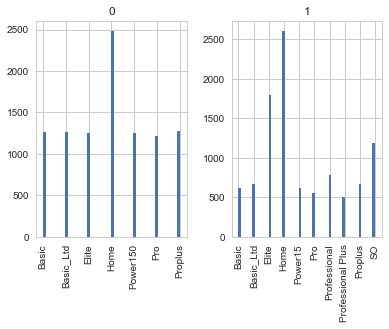

In [532]:
telco_customers.hist(column='SERVICE_PLAN',by='Churn',bins=50)

Clearly there are specific Service Plans whose customers have Churned

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a261f6ef0>,
      dtype=object)

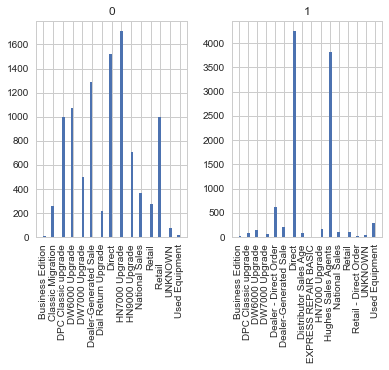

In [539]:
telco_customers.hist(column='MOST_RECENT_SALES_CHANNEL',by='Churn',bins=50)

'Hughes Sales Agents' customers seem to have all churned.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27190438>,
      dtype=object)

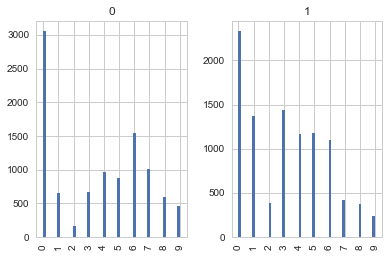

In [571]:
telco_customers.hist(column='INCOME',by='Churn',bins=50)

Looks like customers in 'Annual Income > 10K < 20K' and 'Annual Income > 30K < 40K' are more prone to Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a287acfd0>,
      dtype=object)

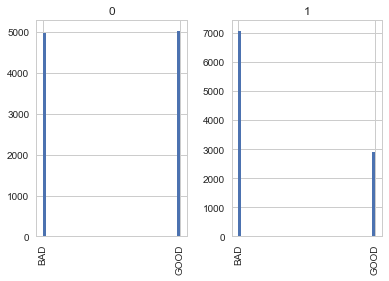

In [573]:
telco_customers.hist(column='FEEDBACK',by='Churn',bins=50)

Clearly BAD Feedback is resulting into Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a28a7da20>,
      dtype=object)

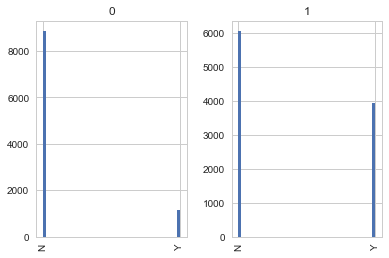

In [575]:
telco_customers.hist(column='COMPUTER_OWNER',by='Churn',bins=50)

Strangely Computer Owners have Churned more!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a29224be0>,
      dtype=object)

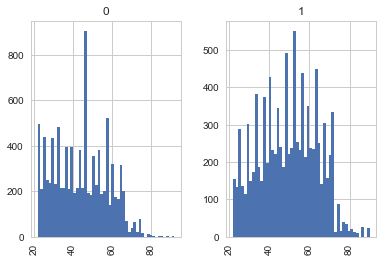

In [578]:
telco_customers.hist(column='AGE',by='Churn',bins=50)

Age group between 40-60 seem to have churned more

# Classification

## Splitting the base table into Train & Test

In [662]:
# train-test split
X = telco_customers.drop(['SITE_ACCOUNT_NUMBER','ZIPCODE','ADDRESS','FIRST_NAME','LAST_NAME','EMAIL_ADDRESS'
                          ,'FIRST_COMMUNICATION_DATE','Churn'], axis=1)
Y = telco_customers['Churn']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=7)

In [663]:
# Label Encoding
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in test_X.columns.values:
    # Encoding only categorical variables
    if test_X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=train_X[col].append(test_X[col])
        le.fit(data.values)
        train_X[col]=le.transform(train_X[col])
        test_X[col]=le.transform(test_X[col])

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Random Forest

In [667]:
rf1 = RandomForestClassifier(n_estimators=200, max_features='auto', 
                           min_samples_split=1200, max_depth=10, min_samples_leaf=75)
rf1.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=75, min_samples_split=1200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

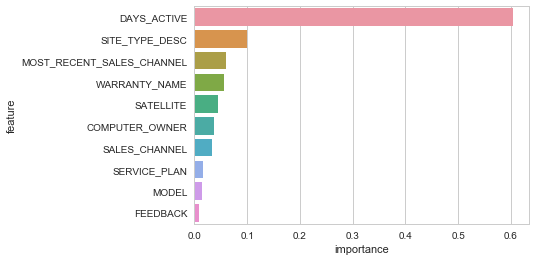

In [665]:
indices = np.argsort(rf1.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         rf1.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[:10] )

In [669]:
print('Train Accuracy:' , accuracy_score(train_Y, rf1.predict(train_X) ))
print('Test Accuracy:' , accuracy_score(test_Y, rf1.predict(test_X) ))

print('Confusion matrix for Train: \n' , confusion_matrix(train_Y, rf1.predict(train_X)))
print('Confusion matrix for Test: \n' , confusion_matrix(test_Y, rf1.predict(test_X) ))

Train Accuracy: 1.0
Test Accuracy: 1.0
Confusion matrix for Train: 
 [[7570    0]
 [   0 7428]]
Confusion matrix for Test: 
 [[2428    0]
 [   0 2572]]


#### Seems like DAYS_ACTIVE is causing the model to overfit. Let's remove this feature and re-run the model

In [671]:
rf2 = RandomForestClassifier(n_estimators=200, max_features='auto', 
                           min_samples_split=1200, max_depth=10, min_samples_leaf=75)
rf2.fit(train_X.drop('DAYS_ACTIVE',axis=1),train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=75, min_samples_split=1200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

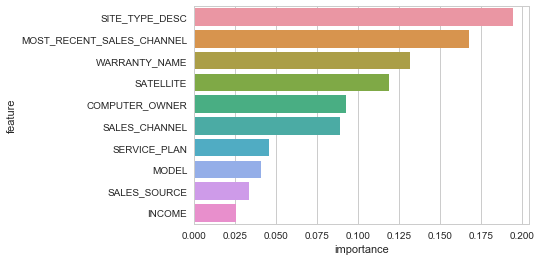

In [672]:
indices = np.argsort(rf2.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.drop('DAYS_ACTIVE',axis=1).shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.drop('DAYS_ACTIVE',axis=1).columns[indices[f]],
                         rf2.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[:10] )

#### SITE_TYPE_DESC, MOST_RECENT_SALES_CHANNEL, WARRANTY_NAME, SATELLITE, COMPUTER_OWNER, SALES_CHANNEL, SERVICE_PLAN are the most important factors impacting Churn. Seems like the reason for Churn are primarily the Quality of Service provided by the Telecom Service Provider.

In [673]:
print('Train Accuracy:' , accuracy_score(train_Y, rf2.predict(train_X.drop('DAYS_ACTIVE',axis=1)) ))
print('Test Accuracy:' , accuracy_score(test_Y, rf2.predict(test_X.drop('DAYS_ACTIVE',axis=1)) ))

print('Confusion matrix for Train: \n' , confusion_matrix(train_Y, rf2.predict(train_X.drop('DAYS_ACTIVE',axis=1))))
print('Confusion matrix for Test: \n' , confusion_matrix(test_Y, rf2.predict(test_X.drop('DAYS_ACTIVE',axis=1)) ))

Train Accuracy: 0.904453927190292
Test Accuracy: 0.8992
Confusion matrix for Train: 
 [[6833  737]
 [ 696 6732]]
Confusion matrix for Test: 
 [[2172  256]
 [ 248 2324]]


## Logistic Regression

In [627]:
lg = LogisticRegression()
lg.fit(train_X.drop('DAYS_ACTIVE',axis=1), train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [645]:
print('Train Accuracy:' , accuracy_score(train_Y, lg.predict(train_X.drop('DAYS_ACTIVE',axis=1))))
print('Test Accuracy:' , accuracy_score(test_Y, lg.predict(test_X.drop('DAYS_ACTIVE',axis=1))))

print('Confusion matrix for Train: \n' , confusion_matrix(train_Y, lg.predict(train_X.drop('DAYS_ACTIVE',axis=1))))
print('Confusion matrix for Test: \n' , confusion_matrix(test_Y, lg.predict(test_X.drop('DAYS_ACTIVE',axis=1)) ))

Train Accuracy: 0.8079743965862115
Test Accuracy: 0.8038
Confusion matrix for Train: 
 [[6288 1282]
 [1598 5830]]
Confusion matrix for Test: 
 [[1994  434]
 [ 547 2025]]


## AdaBoost Classifier

In [677]:
ad = AdaBoostClassifier().fit(train_X.drop('DAYS_ACTIVE',axis=1), train_Y)

In [678]:
print('Train Accuracy:' , accuracy_score(train_Y, ad.predict(train_X.drop('DAYS_ACTIVE',axis=1))))
print('Test Accuracy:' , accuracy_score(test_Y, ad.predict(test_X.drop('DAYS_ACTIVE',axis=1))))

print('Confusion matrix for Train: \n' , confusion_matrix(train_Y, ad.predict(train_X.drop('DAYS_ACTIVE',axis=1))))
print('Confusion matrix for Test: \n' , confusion_matrix(test_Y, ad.predict(test_X.drop('DAYS_ACTIVE',axis=1)) ))

Train Accuracy: 0.9739298573143086
Test Accuracy: 0.9698
Confusion matrix for Train: 
 [[7395  175]
 [ 216 7212]]
Confusion matrix for Test: 
 [[2370   58]
 [  93 2479]]


# Segmentation / Clustering

In [682]:
# Install KModes
!pip install kmodes

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [688]:
# Use the significant features identified above
clustering_data = telco_customers[['SITE_TYPE_DESC','MOST_RECENT_SALES_CHANNEL','WARRANTY_NAME','SATELLITE',
                                  'COMPUTER_OWNER','SALES_CHANNEL','SERVICE_PLAN','MODEL','SALES_SOURCE',
                                  'INCOME','Churn']]
clustering_data.columns

Index(['SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL', 'WARRANTY_NAME',
       'SATELLITE', 'COMPUTER_OWNER', 'SALES_CHANNEL', 'SERVICE_PLAN', 'MODEL',
       'SALES_SOURCE', 'INCOME', 'Churn'],
      dtype='object')

In [690]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(clustering_data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7382, cost: 103109.0
Run 1, iteration: 2/100, moves: 1862, cost: 102828.0
Run 1, iteration: 3/100, moves: 564, cost: 102828.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7781, cost: 104986.0
Run 2, iteration: 2/100, moves: 55, cost: 104986.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7458, cost: 104144.0
Run 3, iteration: 2/100, moves: 1399, cost: 104144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6777, cost: 103470.0
Run 4, iteration: 2/100, moves: 1075, cost: 103470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6158, cost: 104155.0
Run 5, iteration: 2/100, moves: 0, cost: 104155.0
Best run was number 1
[

# Conclusion:

1. With AdaBoost we got 97% accuracy compared to 90% and 80% accuracy with Random Forest and Logistic Regression respectively

2. Following are the important factors affecting Churn:
    
    2.1 SITE_TYPE_DESC, 
    
    2.2 MOST_RECENT_SALES_CHANNEL, 
    
    2.3 WARRANTY_NAME,
    
    2.4 SATELLITE, 
    
    2.5 COMPUTER_OWNER, 
    
    2.6 SALES_CHANNEL, 
    
    2.7 SERVICE_PLAN, 
    
    2.8 MODEL,
    
    2.9 SALES_SOURCE, 
    
    2.10 INCOME
    
3. Segmentation/Clustering Analysis:
    
    3.1 'Hughes Sales Agents' channel need some attention, as almost all of its customers are Churning
    
    3.2 Warranties are not helping stop the Churn
    
    3.3 Customers subscribed to 'Elite' Service Plans have Churned